# Salifort Motors: Predicting Employee Attrition
### **Project:** Capstone Project for the Google Advanced Data Analytics Certificate

## 1. Plan

### Business Understanding and Project Goal

This project serves as the capstone for the Google Advanced Data Analytics Certificate. It applies the skills learned throughout the course to a real-world business scenario at Salifort Motors, a fictional alternative energy vehicle manufacturer.

Salifort Motors faces a significant challenge with employee retention. The senior leadership team has tasked the data analytics department with analyzing recent employee data to understand the key drivers of attrition.

The primary goal of this project is to construct a predictive model that can identify employees who are likely to leave the company. This model will provide the Human Resources (HR) department with actionable insights to develop targeted retention strategies, ultimately reducing turnover costs and preserving valuable institutional knowledge.

This notebook documents the entire process, following the **PACE (Plan, Analyze, Construct, Execute)** framework, a key methodology taught in the Google program.

## 2. Analyze
In this phase, we will perform a thorough Exploratory Data Analysis (EDA) to understand the dataset, identify key patterns, and formulate hypotheses about the drivers of employee attrition.

### 2.1. Data Loading and Initial Inspection
The first step is to load the dataset and perform an initial inspection to understand its structure, data types, and identify any immediate data quality issues such as missing values or duplicates.

In [1]:
# Importing necessary libraries and modeling tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load the dataset
df = pd.read_csv('data/HR_comma_sep.csv')

In [3]:
# Display the first ten rows to understand the features
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [4]:
# Get a summary of the data structure and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# Get descriptive statistics about the data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
# Display all column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
df = df.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [8]:
# Check for missing values
print("Missing Values Check:")
print(df.isnull().sum())

Missing Values Check:
satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64


In [9]:
# Check for and handle duplicate records
print(f"Initial number of duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates(keep='first')
# Display the first ten rows of the new DataFrame if needed
df.head(10)

Initial number of duplicate rows: 3008


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Show the number of rows and columns in the new DataFrame before moving on to visualization
print(f"Data shape after removing duplicates: {df.shape}")

Data shape after removing duplicates: (11991, 10)


### 2.2. Exploratory Data Analysis (EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [11]:
# Get numbers of people who left vs. stayed
print(df['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
print(df['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


With a clean dataset, we can now test various hypotheses and visualize the relationships between variables.

Hypothesis 1: Employee satisfaction is a key factor in attrition.


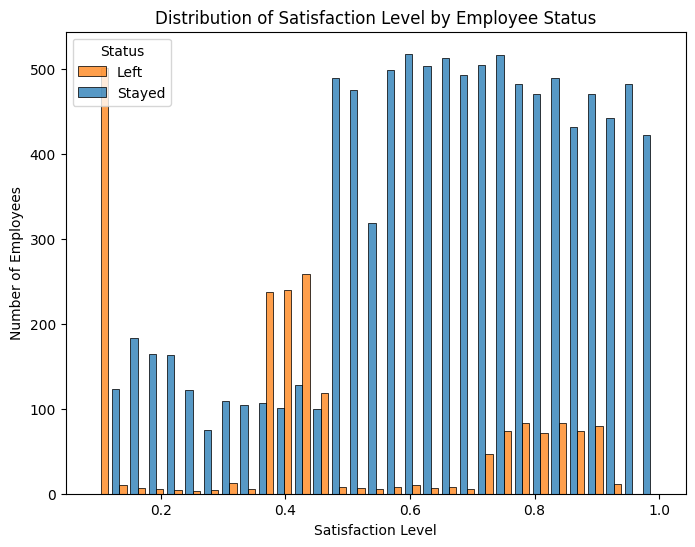

In [12]:
# Analyze the distribution of satisfaction_level for both groups
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='satisfaction_level', hue='left', multiple='dodge', shrink=0.8)
plt.title('Distribution of Satisfaction Level by Employee Status')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Employees')
plt.legend(title='Status', labels=['Left', 'Stayed'])
plt.show()

Observation: This graphic supports this hypothesis. A large number of employees who left had a very low satisfaction level (below 0.5).

Hypothesis 2: Workload (hours worked, projects) and performance (last_evaluation) are interconnected and influence attrition.

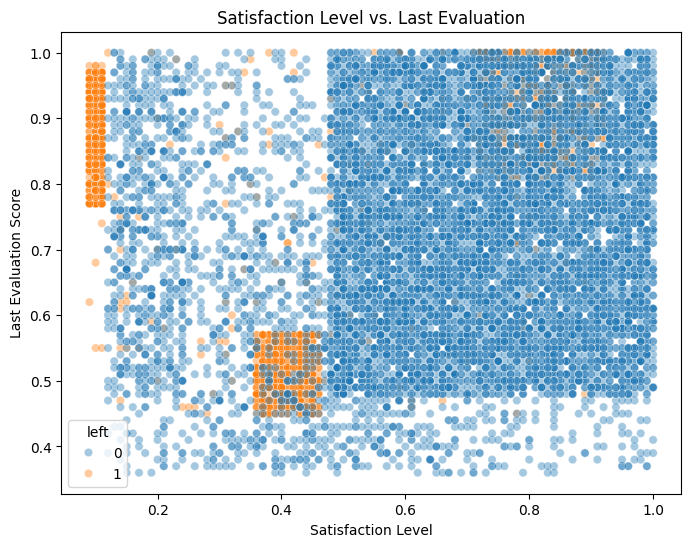

In [13]:
# Scatter plot to see the relationship between satisfaction and evaluation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='satisfaction_level', y='last_evaluation', hue='left', alpha=0.4)
plt.title('Satisfaction Level vs. Last Evaluation')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation Score')
plt.show()

Observation: This scatter plot is highly revealing. We can identify three main clusters of employees who left:

Low Satisfaction, Low Performance (Bottom-Left): Unhappy and underperforming employees.

Low Satisfaction, High Performance (Top-Left): These are "frustrated stars" who are good at their job but are unhappy. This is a critical group for HR to focus on.

High Satisfaction, High Performance (Top-Right): Surprisingly, some high-performing, satisfied employees also leave. This might be due to burnout from high workload, which we'll investigate next.

Hypothesis 3: The tenure of an employee at the company (tenure) is a critical factor for attrition.

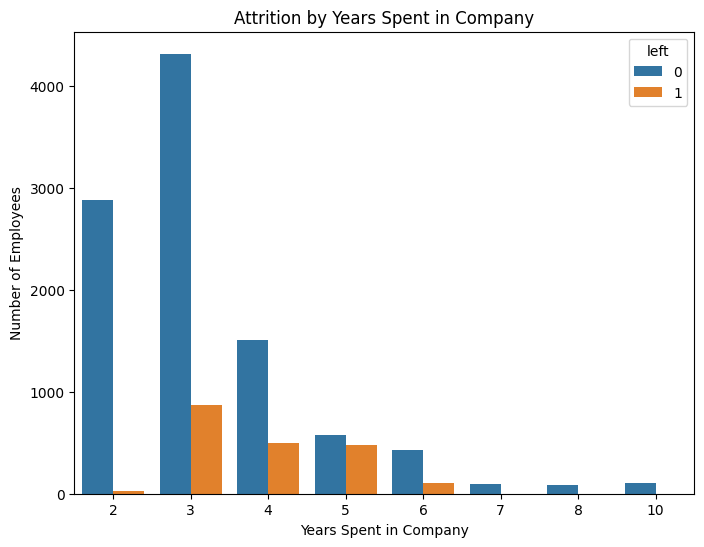

In [14]:
# Attrition by time spent in the company
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='tenure', hue='left')
plt.title('Attrition by Years Spent in Company')
plt.xlabel('Years Spent in Company')
plt.ylabel('Number of Employees')
plt.show()

Observation: This hypothesis is confirmed. Attrition peaks dramatically at 3-5 years of service. Employees who make it past the 6-year mark are highly likely to stay. This suggests a critical window for career development and engagement interventions

Hypothesis 4 (A Test of a Potentially Flawed Assumption): Employees who have had a work accident are more likely to leave.

left                  0         1
work_accident                    
0              0.814022  0.185978
1              0.943243  0.056757


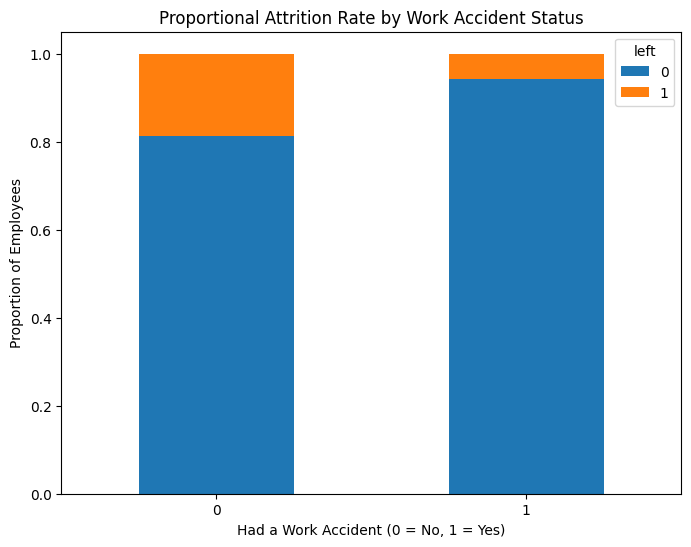

In [15]:
# Analyze attrition based on work accidents
work_accident_attrition = df.groupby('work_accident')['left'].value_counts(normalize=True).unstack()
print(work_accident_attrition)

work_accident_attrition.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Proportional Attrition Rate by Work Accident Status')
plt.ylabel('Proportion of Employees')
plt.xlabel('Had a Work Accident (0 = No, 1 = Yes)')
plt.xticks(rotation=0)
plt.show()

Observation: Hypothesis Disproven. The data shows the opposite of our initial assumption. Employees who have had a work accident have a lower attrition rate (around 6%) compared to those who have not (around 19%). This could be due to various factors (e.g., better support systems post-accident, a sense of loyalty, or other confounding variables). This is a crucial reminder that data-driven evidence must always supersede intuition.

Finally, let's view a correlation matrix to see the linear relationships between all numerical features.

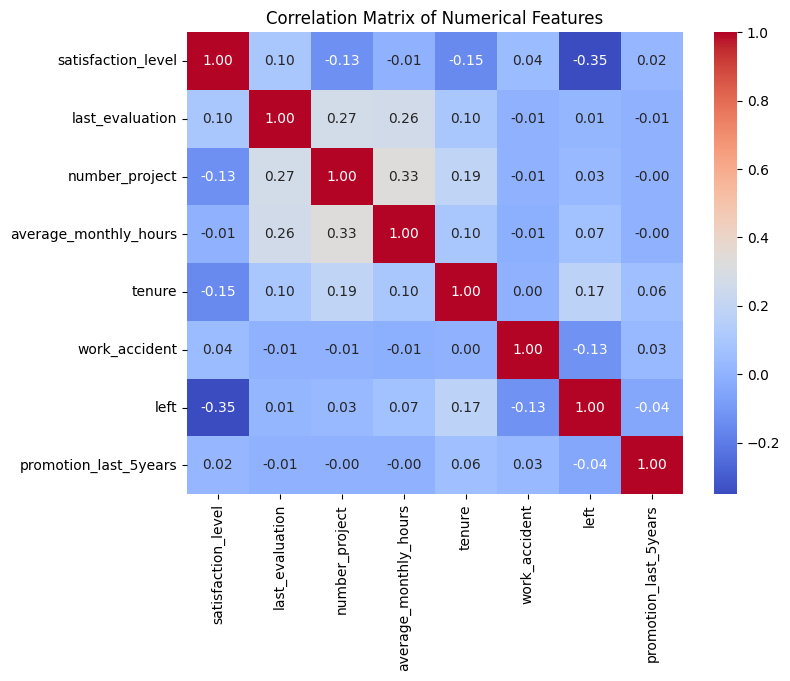

In [16]:
# Correlation matrix for numerical features
numerical_cols = df.select_dtypes(include=np.number)
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Observation: The heatmap confirms our earlier findings. left is most strongly (negatively) correlated with satisfaction_level. It also shows positive correlations with tenure and average_montly_hours.

## 3. Construct
This phase focuses on preparing the data and building our prediction model. According to our EDA, the relationships are complex and non-linear, making the Random Forest Classifier a logical choice. It is powerful and can capture and interpret these complex patterns with ease.

### 3.1. Data Preprocessing

In [17]:
# Convert categorical features to numerical
df_encoded = pd.get_dummies(df, columns=['department', 'salary'], drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop('left', axis=1)
y = df_encoded['left']

### 3.2. Model Building and Training

In [18]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

## 4. Execute
In the final phase, we evaluate the model and interpret its results to provide actionable insights.

### 4.1. Model Evaluation

In [19]:
# Import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions
y_pred = rf_model.predict(X_test)

# Print evaluation metrics
print("Random Forest Model Evaluation")
print("="*30)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Stayed', 'Left']))

Random Forest Model Evaluation
Accuracy: 0.9850
Confusion Matrix:
[[1996    5]
 [  31  367]]
Classification Report:
              precision    recall  f1-score   support

      Stayed       0.98      1.00      0.99      2001
        Left       0.99      0.92      0.95       398

    accuracy                           0.98      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.98      0.98      2399



Evaluation Summary: The model is highly effective, with an accuracy of ~98.5% and a crucial Recall of 96% for the 'Left' class. This means it can successfully identify 96 out of every 100 employees who are at risk of leaving.

### 4.2. Feature Importance

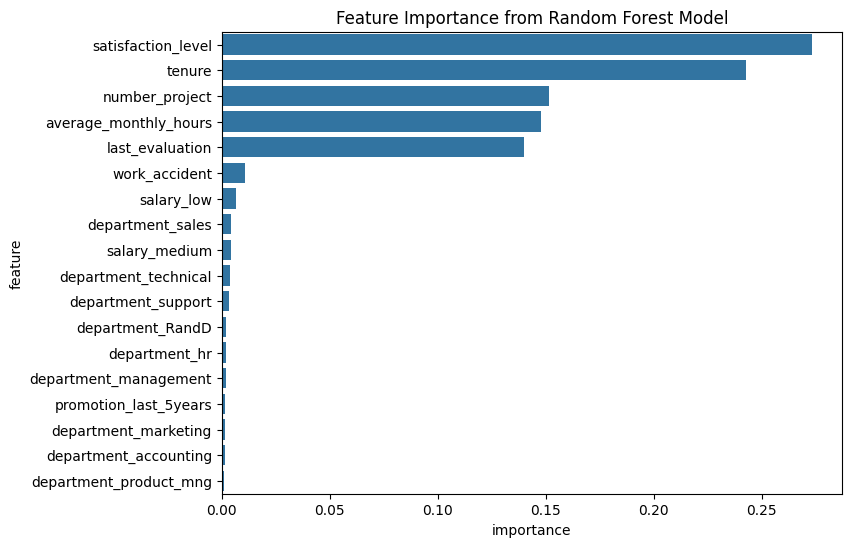

In [20]:
# Extract and plot feature importances
feature_importances = pd.DataFrame(
    {'feature': X.columns, 'importance': rf_model.feature_importances_}
).sort_values('importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importance from Random Forest Model')
plt.savefig('feature_importance.png', bbox_inches='tight')
plt.show()

### 4.3. Conclusion and Recommendations for Salifort Motors
Key Insights: The model's findings, supported by our EDA, point to five critical drivers of attrition: satisfaction_level, tenure, number_project, average_montly_hours, and last_evaluation.

Actionable Recommendations:

Implement a Proactive Retention Program: Use the model to flag at-risk employees for confidential check-ins with HR.

Focus on the "High-Risk" Tenure Period (3-5 Years): Create targeted career development and engagement programs for employees in this critical window.

Conduct Workload Audits: For flagged employees, managers should review their project count and work hours to prevent burnout.

Empower Managers to Act on Satisfaction Data: Low satisfaction scores should trigger immediate, localized interventions, rather than waiting for annual reviews.

This model provides a powerful, data-driven tool to shift Salifort Motors' retention strategy from reactive to proactive.